## **Series de tiempo**

Para esta práctica trabajaremos con un dataset de temperaturas de la Ciudad Autónoma de Buenos Aires.

Es fundamental que, como data scientist, conozcamos en detalle las funcionalidades y características que nos brinda el módulo `datetime` provisto por Python. En esta línea, aconsejamos revisar y tener como fuente de consulta el siguiente [link](https://realpython.com/python-datetime/). 

También, familiarizarnos con ella, nos hará más amena la tarea de trabajar con fechas en series de tiempo.

En esta primera práctica ahondaremos en cómo realizar un EDA en series de tiempo e indenfificar sus componentes.

En una segunda práctica haremos forecasting con `ARIMA`, dentro de los modelos clásicos estocásticos.

### 1. EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime # Para trabajar con fechas y horas de manera más sencilla en Python
sns.set()

In [4]:
data = pd.read_csv('.\Datasets\Clase_04_temperatura_transf.csv')

In [6]:
data.head(10)

,dia,mes,anio,Tmax,Tmin
0,1,1,1959,25.6,11.6
1,2,1,1959,26.2,16.4
2,3,1,1959,27.3,18.8
3,4,1,1959,25.4,16.6
4,5,1,1959,21.6,10.7
5,6,1,1959,22.8,12.2
6,7,1,1959,27.6,12.8
7,8,1,1959,31.8,15.4
8,9,1,1959,23.5,12.4
9,10,1,1959,29.9,10.3


In [7]:
data.anio.max() - data.anio.min() # o 
#data["anio"].max() - data["anio"].min()

59

Tenemos una `frecuencia de muestreo` diaria y una `ventana temporal` con un tamaño de 59 años

Tenemos la información suficiente como para crear el campo `fecha`. Veamos cómo hacerlo:

In [9]:
data['fecha'] = pd.to_datetime({'year':data['anio'], 'month': data.mes, 'day': data.dia})  # Creo una nueva columna con la fecha en formato datetime (año-mes-día)

In [10]:
data.head(3)

,dia,mes,anio,Tmax,Tmin,fecha
0,1,1,1959,25.6,11.6,1959-01-01
1,2,1,1959,26.2,16.4,1959-01-02
2,3,1,1959,27.3,18.8,1959-01-03


Ya no necesitamos las columnas que utilizamos para crear el campo fecha.

In [11]:
data.drop(columns= ['dia','mes', 'anio'], inplace = True) # Elimino las columnas que no me interesan (dia, mes, año)

In [12]:
data.head(3)

,Tmax,Tmin,fecha
0,25.6,11.6,1959-01-01
1,26.2,16.4,1959-01-02
2,27.3,18.8,1959-01-03


Es momento de visualizar nuestra serie de tiempo.

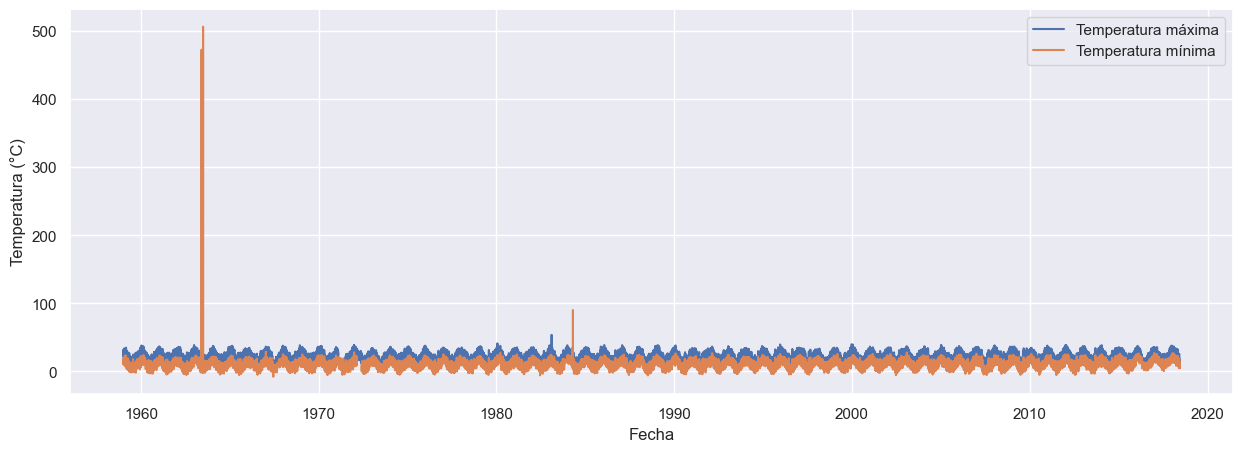

In [13]:
plt.figure(figsize = (15,5))

plt.plot(data.fecha, data.Tmax, label = 'Temperatura máxima') # Grafico la temperatura máxima en función de la fecha
plt.plot(data.fecha, data.Tmin, label = 'Temperatura mínima') # Grafico la temperatura mínima en función de la fecha
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
#plt.ylim(-10,40)
plt.show()

Tenemos algunos outliers que nos amplían en demasía el valor máximo del eje Y. Probemos limitar el eje Y.

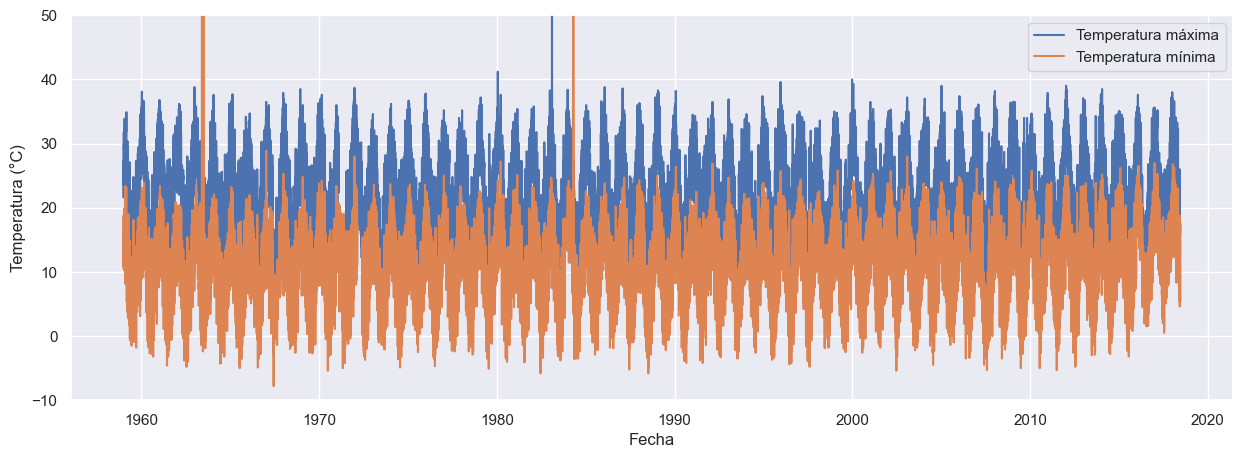

In [15]:
plt.figure(figsize = (15,5))

plt.plot(data.fecha, data.Tmax, label = 'Temperatura máxima') # Grafico la temperatura máxima en función de la fecha
plt.plot(data.fecha, data.Tmin, label = 'Temperatura mínima') # Grafico la temperatura mínima en función de la fecha
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.ylim(-10,50) # Limito el eje y entre -10 y 50
plt.show()

Como recordarán de lo visto en la clase teórica, cuando tenemos una frecuencia de muestreo relativamente chica en una ventana temporal grande corremos el riesgo de que, al querer graficarla, obtengamos una serie muy distorsionada o saturada. Para ello, recurríamos al `resampleo`.

Probemos reaugrupar o resumir nuestros datos en una frecuencia de muestreo más grande -semanal o mensual-.

In [16]:
# Agrupamos nuestras mediciones por el promedio semanal
semanal = data.resample('W', on = 'fecha').mean() # Agrupo por promedio semanal y lo guardo en una nueva variable (semanal)
semanal.head()

,Tmax,Tmin
fecha,,
1959-01-04,26.125000,15.850000
1959-01-11,26.600000,12.785714
1959-01-18,28.300000,16.885714
1959-01-25,31.300000,16.400000
1959-02-01,27.633333,16.014286


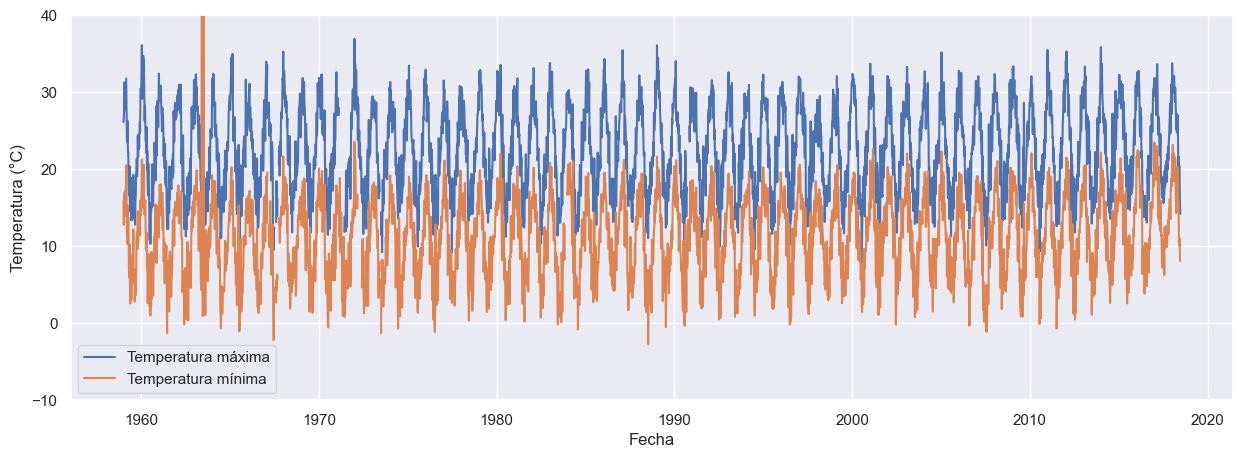

In [18]:
plt.figure(figsize = (15,5))

plt.plot(semanal.index, semanal.Tmax, label = 'Temperatura máxima')
plt.plot(semanal.index, semanal.Tmin, label = 'Temperatura mínima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.ylim(-10,40)
plt.legend()
plt.show()

Mejoró un poco, ¿verdad? 

Comenten la línea `plt.ylim(-10,40)` y noten un detalle respecto a la primera visualuzación que hicimos. Ahora, nuestro pico del outlier más alto ya no está en torno a los 500º sino cercano a los 80º ¿Por qué creés que sucedió esto?

In [19]:
# Ahora veamos qué pasa si reagrupamos las temperaturas mensualmente.

mensual = data.resample('M', on = 'fecha').mean() # Agrupo por promedio mensual y lo guardo en una nueva variable (mensual) 
mensual.head()

,Tmax,Tmin
fecha,,
1959-01-31,28.183871,15.554839
1959-02-28,NaN,16.832143
1959-03-31,25.606452,13.861290
1959-04-30,19.143333,9.946667
1959-05-31,17.270968,6.367742


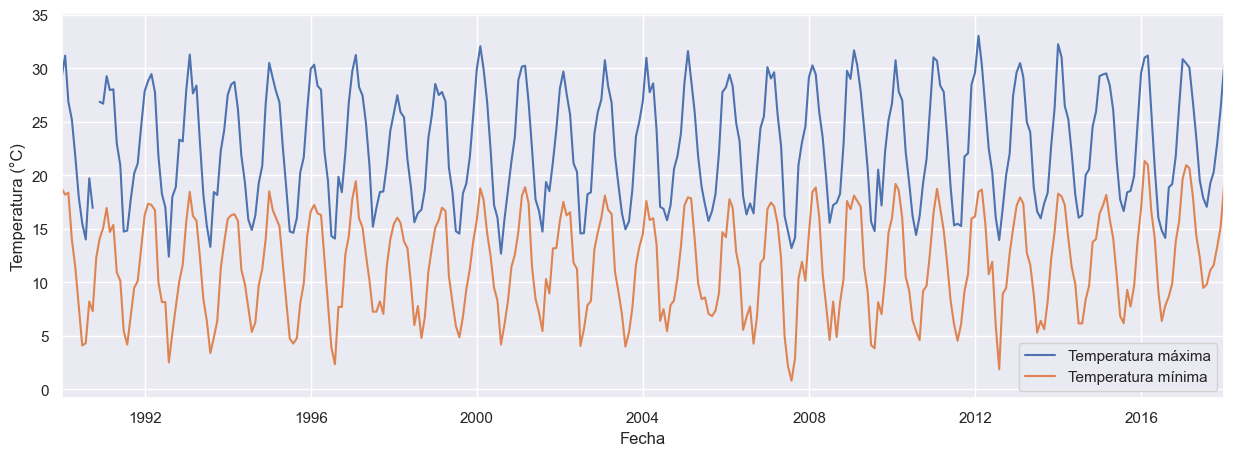

In [23]:
plt.figure(figsize = (15,5))

plt.plot(mensual.index, mensual.Tmax, label = 'Temperatura máxima') # Grafico la temperatura máxima en función de la fecha
plt.plot(mensual.index, mensual.Tmin, label = 'Temperatura mínima') # Grafico la temperatura mínima en función de la fecha
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
#plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))

plt.legend()
plt.show()

En este caso, ya no es necesario limitar el eje Y por la miniaturización del gráfico que probocaba nuestro punto máximo.

Práctiquemos un caso de uso la librería `datetime` para limitar el periodo temporal que queremos abarcar de nuestra serie.

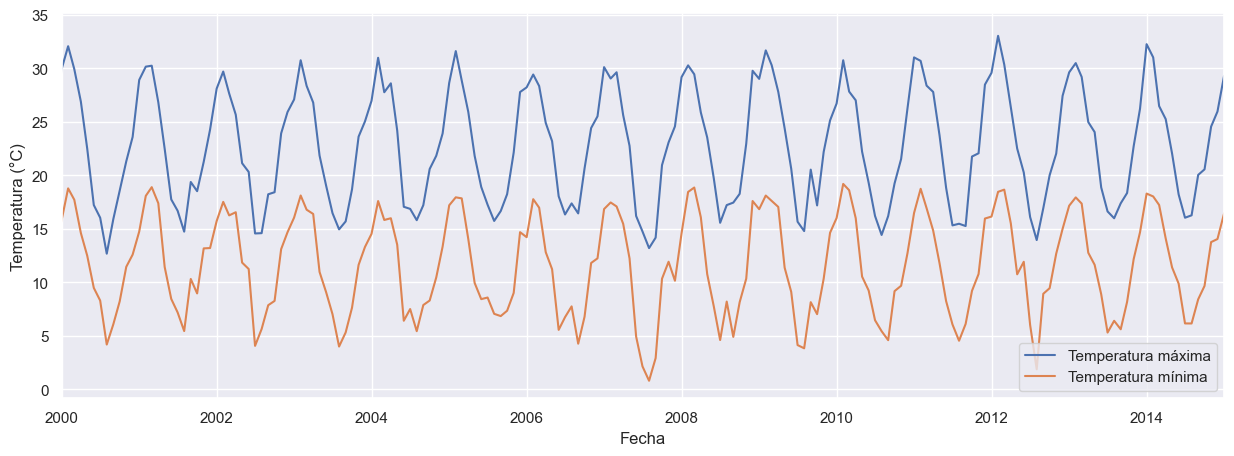

In [20]:
plt.figure(figsize = (15,5))

plt.plot(mensual.index, mensual.Tmax, label = 'Temperatura máxima') # Grafico la temperatura máxima en función de la fecha
plt.plot(mensual.index, mensual.Tmin, label = 'Temperatura mínima') # Grafico la temperatura mínima en función de la fecha
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.xlim(datetime.date(2000,1,1), datetime.date(2015,1,1)) # Limito el eje x entre 2000 y 2015 

plt.legend()
plt.show()

### **`Componentes de la serie de tiempo`**   

**`Veremos dos formas de obtenerlas: *media móvil* y *regresión lineal*.`**

***Media móvil***

Aquí utilizaremos la función *rolling window*. Fijaremos una ventana que define la cantidad de registros anteriores + actual para realizar el promedio en la fila actual.

Vamos a sacar algunos valores de medición y, a su vez, rellenar los faltantes.

In [23]:
semanal.Tmin[semanal.Tmin > 50] = np.nan # asigna NaN a los valores mayores a 50 en la columna Tmin

In [24]:
# Observamos cuántos faltantes tenemos

print(semanal.isnull().sum()) # Cantidad de valores faltantes por columna

Tmax    39
Tmin    32
dtype: int64


In [25]:
# Imputamos faltantes con la función interpolate
semanal = semanal.interpolate() # Interpola los valores faltantes 

Ahora vamos a obtener la temperatura promedio semanal -combinando las temperaturas mínimas y máximas-.

In [26]:
semanal['Tmean'] = (semanal.Tmax + semanal.Tmin)/2 # Creo una nueva columna con el promedio entre Tmax y Tmin (Tmean)

In [27]:
semanal.head(3)

,Tmax,Tmin,Tmean
fecha,,,
1959-01-04,26.125,15.850000,20.987500
1959-01-11,26.600,12.785714,19.692857
1959-01-18,28.300,16.885714,22.592857


Pasemos a establecer el tamaño nuestra ventana móvil:

In [28]:
# Probar ir variando este valor donde elegimos la cantidad de semanas con la que se irá calculando la media

ventana = (105) # Cantidad de semanas con la que se irá calculando la media móvil

In [34]:
semanal_promedio_tendencia = semanal.Tmean.rolling(window=ventana, center = True).mean() # Calculo la media móvil con la función rolling 
semanal_promedio_tendencia.iloc[51:100,] # Muestro las primeras 200 filas

fecha
1959-12-27          NaN
1960-01-03    16.361854
1960-01-10    16.375238
1960-01-17    16.417664
1960-01-24    16.426236
1960-01-31    16.403107
1960-02-07    16.428050
1960-02-14    16.431230
1960-02-21    16.436865
1960-02-28    16.413050
1960-03-06    16.349104
1960-03-13    16.355295
1960-03-20    16.363934
1960-03-27    16.402302
1960-04-03    16.387744
1960-04-10    16.366247
1960-04-17    16.360873
1960-04-24    16.366791
1960-05-01    16.374683
1960-05-08    16.426791
1960-05-15    16.403594
1960-05-22    16.432982
1960-05-29    16.489921
1960-06-05    16.496927
1960-06-12    16.492166
1960-06-19    16.466315
1960-06-26    16.481485
1960-07-03    16.511145
1960-07-10    16.482166
1960-07-17    16.452029
1960-07-24    16.471757
1960-07-31    16.397472
1960-08-07    16.445975
1960-08-14    16.458390
1960-08-21    16.467642
1960-08-28    16.508957
1960-09-04    16.559773
1960-09-11    16.552630
1960-09-18    16.566644
1960-09-25    16.572971
1960-10-02    16.564127
1960-10-09

*Cuanto más grande sea nuestra ventana, más valores necesitará para empezar a establecer valores y, por ende, más faltantes observemos en el dataframe*.

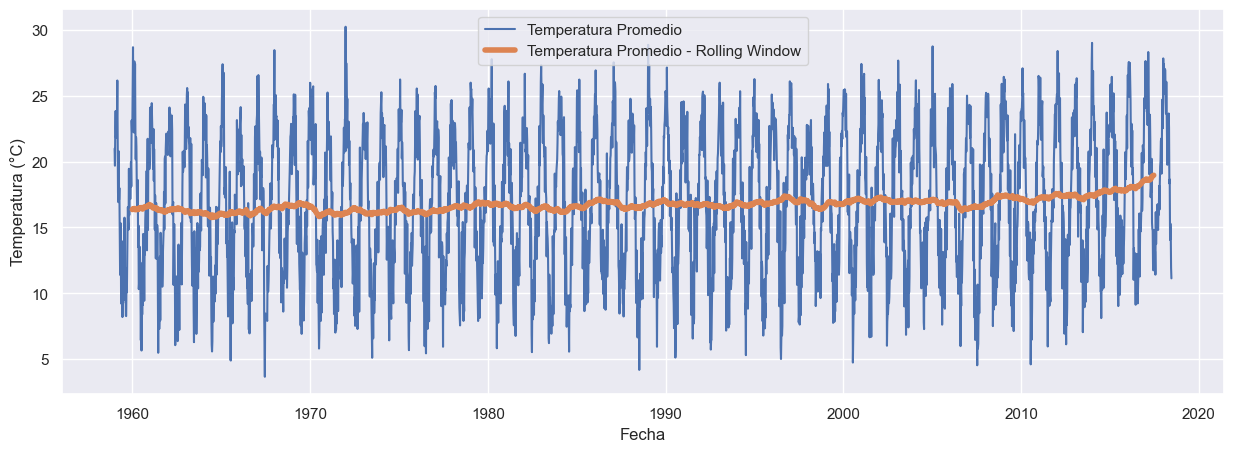

In [35]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.Tmean, label = 'Temperatura Promedio')
plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Temperatura Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

***Tendencia lineal***

Aquí ajustaremos una regresión lineal a la serie. Tomar en consideración que la aplicabilidad de este método es muy limitada a casos muy puntuales.

Como primer paso, no podemos utilizar una regresión lineal con el tipo de fechas que tenemos, por lo que habrá que pasarlas a un formato numérico.

In [36]:
semanal['fecha_numeros']=semanal.index.map(datetime.datetime.toordinal)

In [37]:
semanal.head()

,Tmax,Tmin,Tmean,fecha_numeros
fecha,,,,
1959-01-04,26.125000,15.850000,20.987500,715148
1959-01-11,26.600000,12.785714,19.692857,715155
1959-01-18,28.300000,16.885714,22.592857,715162
1959-01-25,31.300000,16.400000,23.850000,715169
1959-02-01,27.633333,16.014286,21.823810,715176


In [38]:
from sklearn.linear_model import LinearRegression

reg_lineal = LinearRegression() #Instanciamos el modelo

reg_lineal.fit(semanal.fecha_numeros.values.reshape(-1, 1), semanal.Tmean) # Entrenamos el modelo con los datos de entrenamiento (fecha y temperatura) 

LinearRegression()

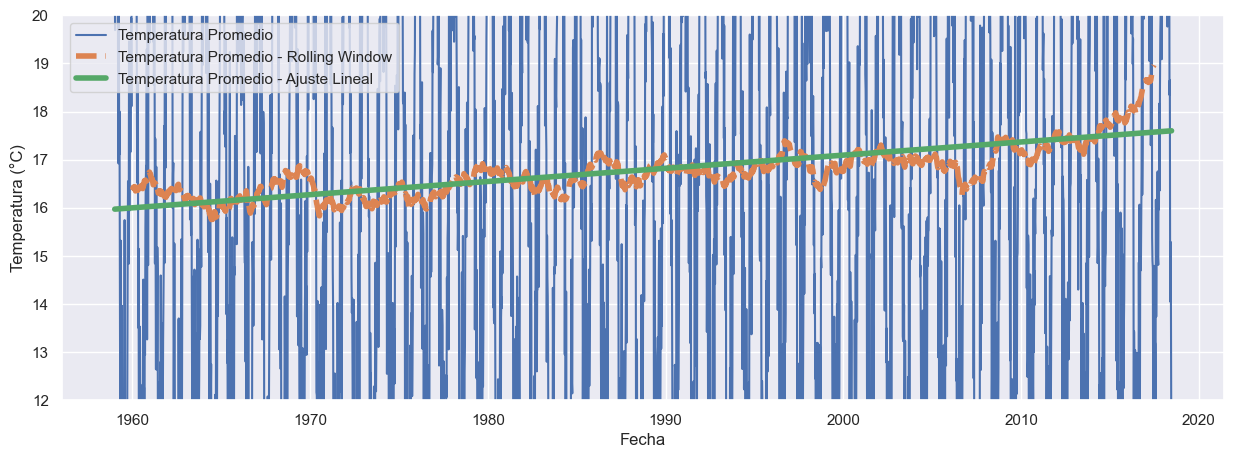

In [41]:
plt.figure(figsize = (15,5)) 

plt.plot(semanal.index, semanal.Tmean, label = 'Temperatura Promedio') # Graficamos la temperatura promedio
plt.plot(semanal_promedio_tendencia, ls = '--', lw = 4, label = 'Temperatura Promedio - Rolling Window') # Graficamos la temperatura promedio con la ventana móvil 
plt.plot(semanal.index, reg_lineal.predict(semanal.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Temperatura Promedio - Ajuste Lineal') # Graficamos la temperatura promedio con el ajuste lineal

plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.ylim(12,20)
plt.show()

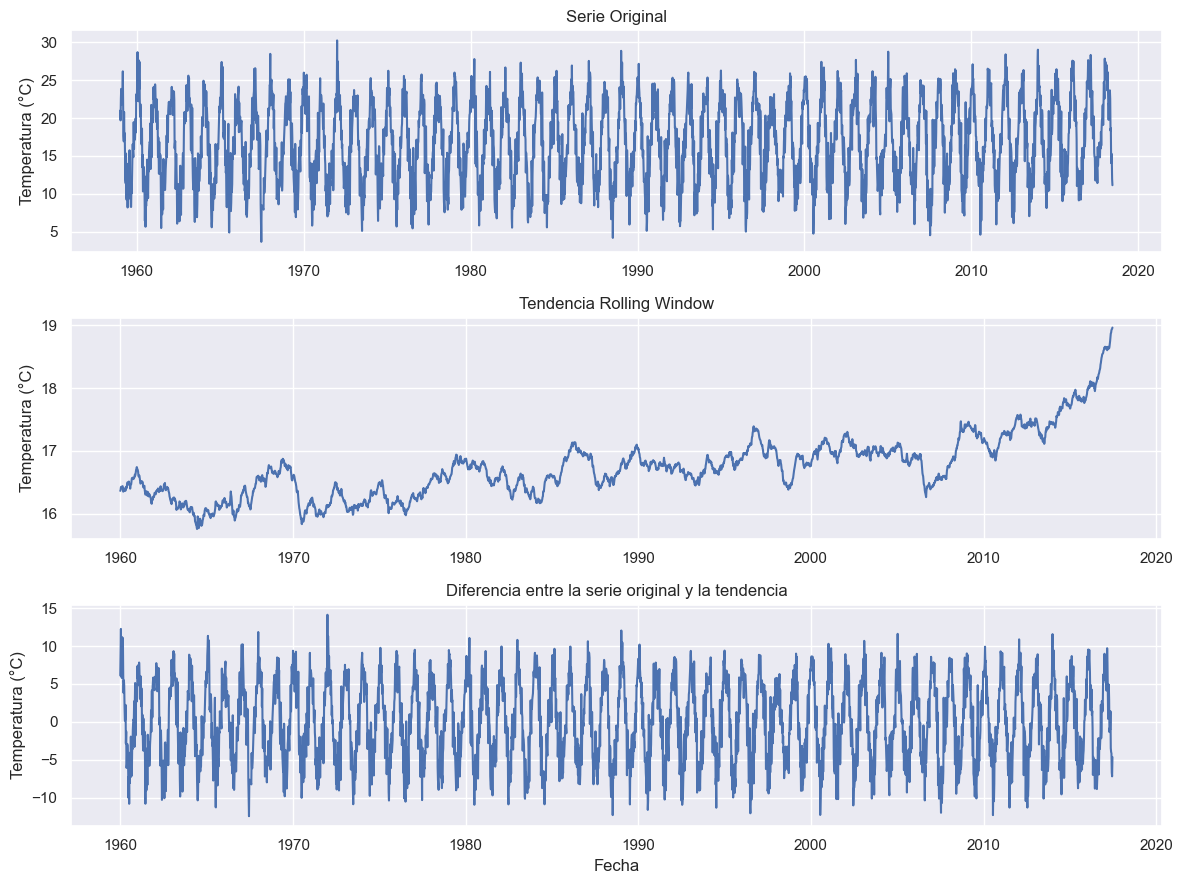

In [171]:
# Veamos las componentes
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(semanal.index, semanal.Tmean)
plt.ylabel('Temperatura (°C)')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(semanal_promedio_tendencia)
plt.ylabel('Temperatura (°C)')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(semanal.index, semanal.Tmean - semanal_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')

plt.tight_layout()
plt.show()

***Estacionalidad***

En este caso, agrupamos los datos por mes y mostramos las distribuciones de cada grupo. De esta manera, se visualiza la estacionalidad anual. Podría buscarse, también, una estacionalidad mensual y agrupar los datos por día. Todo eso depende de los datos con los que estemos trabajando. Aquí, como estamos trabajando con temperaturas, al observar una estacionalidad anual podemos corroborar el patrón y la incidenciade las 4 estaciones del año en la temperatura promedio.

Text(0, 0.5, 'Temperatura')

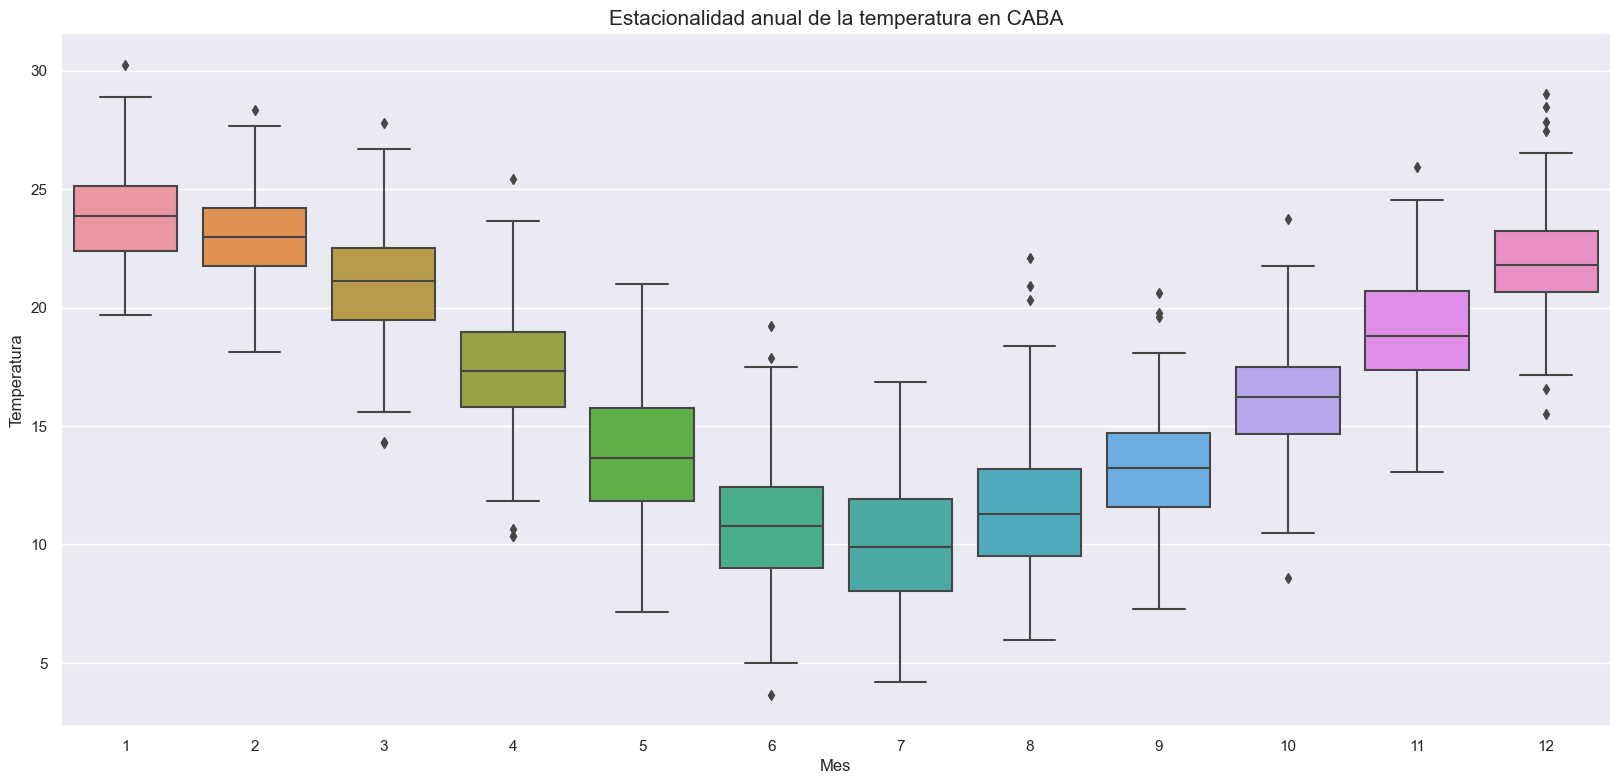

In [172]:
# Agrupamos los datos por mes y mostramos las distribuciones de cada grupo. De esta manera, se visualiza la estacionalidad anual.

plt.figure(figsize = (20,9))
sns.boxplot(data=semanal,x=semanal.index.month,y= semanal.Tmean)
plt.title('Estacionalidad anual de la temperatura en CABA', fontsize = 15)
plt.xlabel('Mes')
plt.ylabel('Temperatura')

Existen dos librerías muy importantes que nos permiten obtener las componentes de una serie de tiempo de manera más sencilla. 

Una es `stats model` y la otra `Prophet`.

Recomendamos ir familiarizándose con la primera de ellas.

***Stats model***

In [42]:
#import sys
#!{sys.executable} -m pip install statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(semanal.Tmean, model='additive') # y= t+s+u podría ser y=t*s*u # modelo aditivo es el que se usa por defecto 

#modelo aditivo = Tendencia + Estacionalidad + Error
#modelo multiplicativo = Tendencia * Estacionalidad * Error

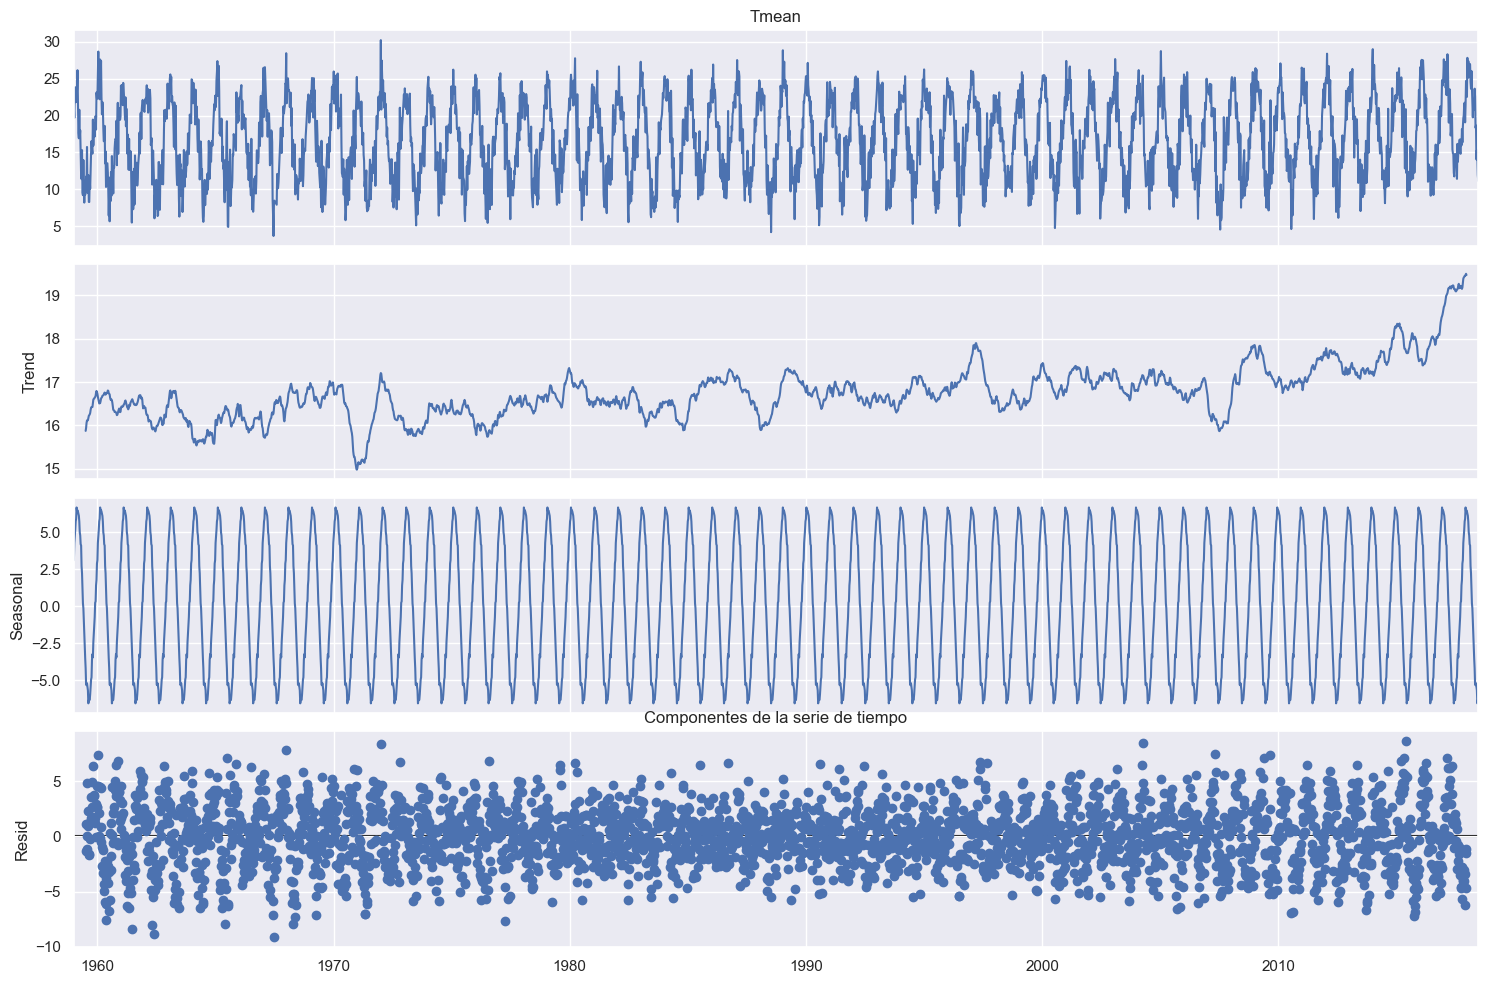

In [43]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,10]
result.plot()
plt.title('Componentes de la serie de tiempo')
plt.show()

# en esta grafica se puede observar que la tendencia es creciente, es decir, que el numero de pasajeros va en aumento conforme pasan los años 
# y que la estacionalidad es periodica, es decir, que se repite cada cierto tiempo
# los residuos son los errores que se cometen al predecir los valores de la serie de tiempo


In [63]:
#Exportamos el csv ya transformado
#semanal.drop(columns = 'fecha_numeros', inplace = True)
#semanal.to_csv('Clase_04_temperatura_transf.csv')